In [1]:
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def drop_epochs_by_sigma(epochs, sd):
    maximas=[]
    for i in range(epochs.get_data().shape[0]):
        maximas.append(epochs.get_data()[i].max(axis=1))
    maximas=np.array(maximas)
    maximas_std=maximas.std(axis=0)
    maximas_mean=maximas.mean(axis=0)
    th_max=maximas_mean+sd*maximas_std
    th_min=maximas_mean-sd*maximas_std
    rej=[]
    for i in range(epochs.get_data().shape[0]):
        for j in range(epochs.get_data().shape[1]):
            if maximas [i, j]>th_max[j] or maximas[i,j]<th_min[j]:
                rej.append(i)
    print()
    reject_list=list(set(rej))
    epochs.drop(reject_list)

In [3]:
raw = mne.io.read_raw_brainvision('C:\\Users\\ACER\\Desktop\\pythondata\\FZ021intensity.vhdr' , preload=True)
raw_new = raw.copy().filter(0.1, 40., phase='zero-double')

Extracting parameters from C:\Users\ACER\Desktop\pythondata\FZ021intensity.vhdr...
Setting channel info structure...
Reading 0 ... 344089  =      0.000 ...   688.178 secs...


C:\Users\ACER\AppData\Local\Temp\ipykernel_3512\3093755580.py:1: RuntimeWarning: No coordinate information found for channels ['empty', 'gsr']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  raw = mne.io.read_raw_brainvision('C:\\Users\\ACER\\Desktop\\pythondata\\FZ021intensity.vhdr' , preload=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_3512\3093755580.py:1: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision('C:\\Users\\ACER\\Desktop\\pythondata\\FZ021intensity.vhdr' , preload=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_3512\3093755580.py:1: RuntimeWarning: Channels contain different highpass filters. Lowest (weakest) filter setting (0.00 Hz) will be stored.
  raw = mne.io.read_raw_brainvision('C:\\Users\\ACER\\Desktop\\pythondata\\FZ021intensity.vhdr' , preload=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_3512\3093755580.py:1: RuntimeWarnin

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-12 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-12 dB cutoff frequency: 45.00 Hz)
- Filter length: 16501 samples (33.002 sec)



C:\Users\ACER\AppData\Local\Temp\ipykernel_3512\3093755580.py:1: RuntimeWarning: Not setting positions of 3 misc channels found in montage:
['empty', 'gsr', 'photo']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = mne.io.read_raw_brainvision('C:\\Users\\ACER\\Desktop\\pythondata\\FZ021intensity.vhdr' , preload=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    2.6s finished


In [4]:
raw_new.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, ...
 chs: 63 EEG, 3 misc
 custom_ref_applied: False
 dig: 66 items (3 Cardinal, 63 EEG)
 highpass: 0.1 Hz
 lowpass: 40.0 Hz
 meas_date: 2022-12-23 16:17:55 UTC
 nchan: 66
 projs: []
 sfreq: 500.0 Hz
>

Using matplotlib as 2D backend.


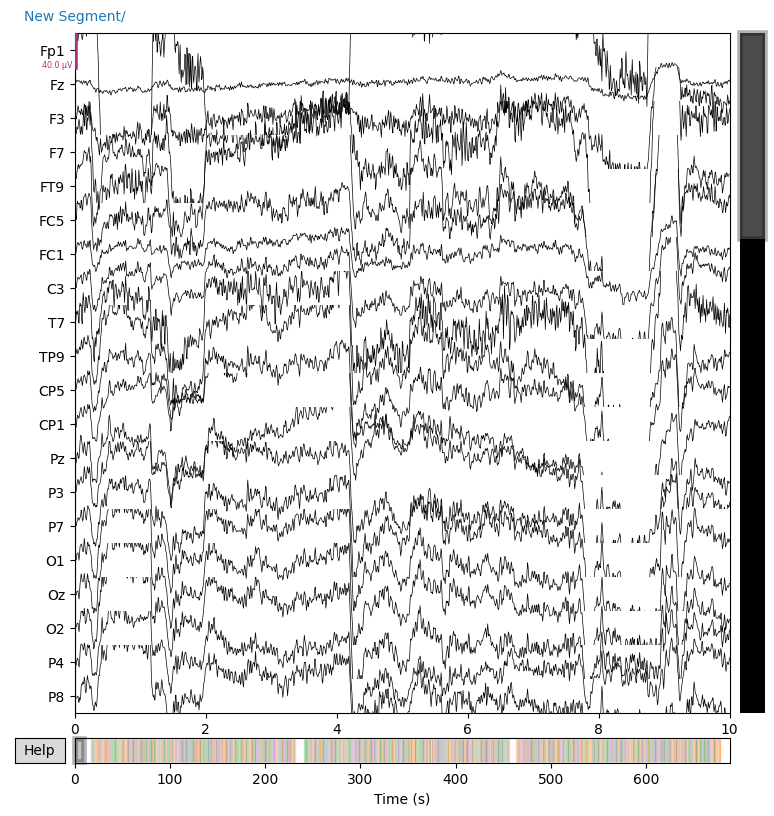

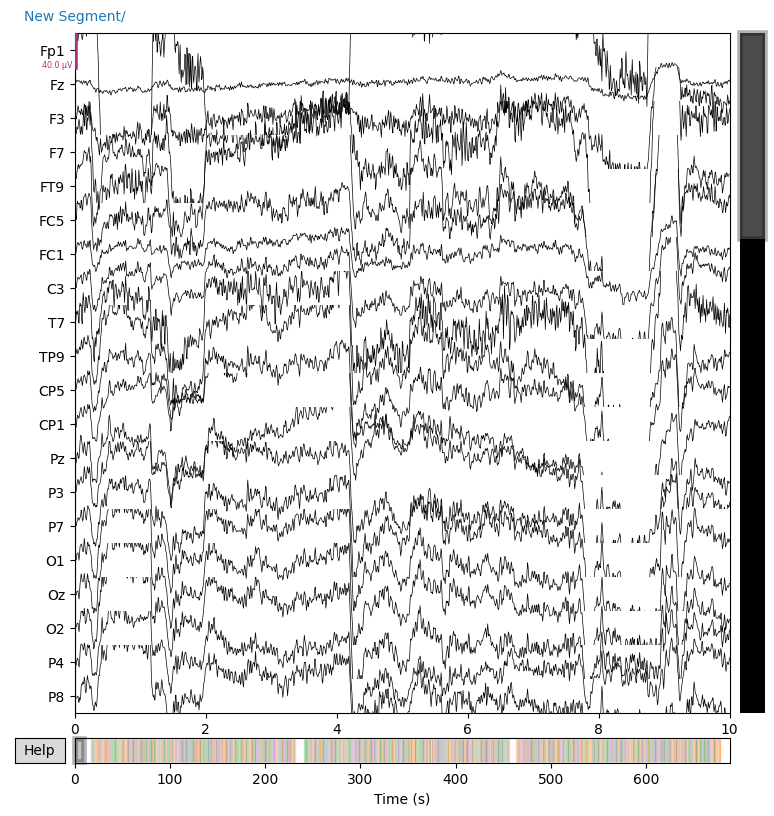

In [5]:
raw_new.plot()

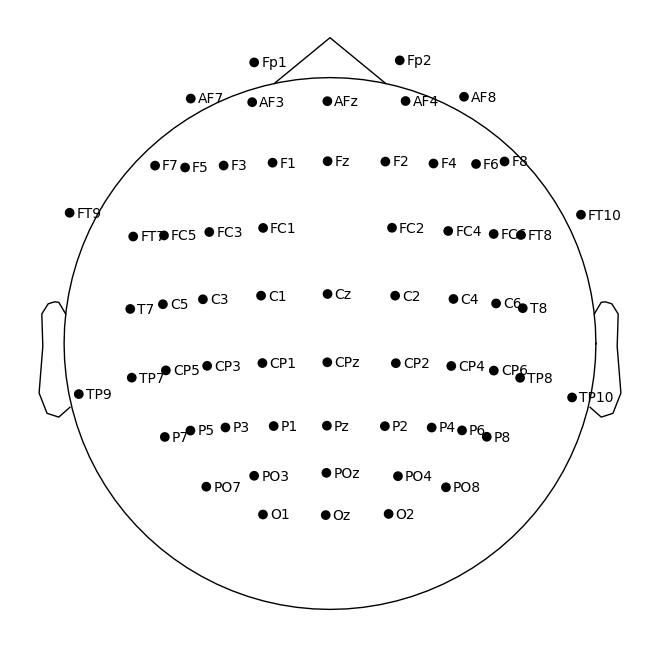

In [6]:
raw_new.set_montage('standard_1020')
raw_new.plot_sensors(show_names=True);

In [7]:
events = mne.events_from_annotations(raw_new)

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4']


In [8]:
events[1]

{'New Segment/': 99999,
 'Stimulus/S  1': 1,
 'Stimulus/S  2': 2,
 'Stimulus/S  3': 3,
 'Stimulus/S  4': 4}

Not setting metadata
721 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


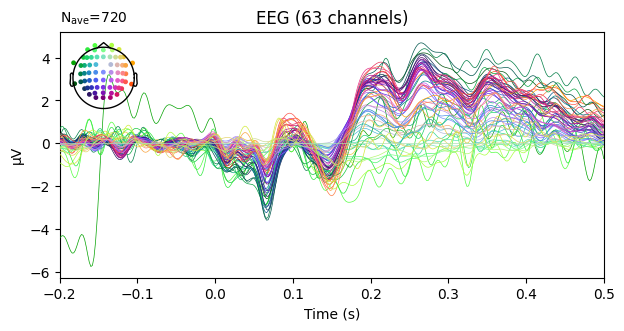

In [9]:
epochs = mne.Epochs(raw_new, events[0])
epochs.average().plot();

In [10]:
list_of_bads=['FT9']

In [11]:
raw_new.info['bads']=list_of_bads
raw_new.interpolate_bads()

Interpolating bad channels
    Automatic origin fit: head of radius 95.6 mm
Computing interpolation matrix from 62 sensor positions
Interpolating 1 sensors


<RawBrainVision | FZ021_intensity.eeg, 66 x 344090 (688.2 s), ~173.4 MB, data loaded>

Not setting metadata
721 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


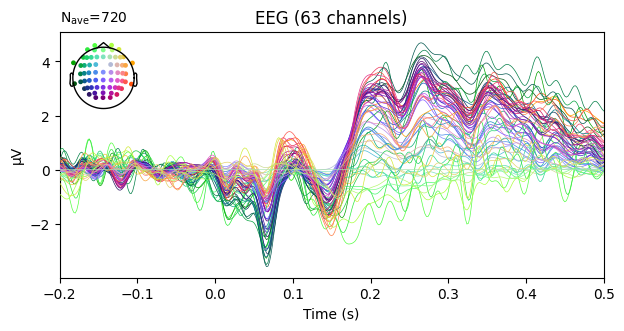

In [12]:
epochs = mne.Epochs(raw_new, events[0])
epochs.average().plot();

In [13]:
raw_new.set_eeg_reference(ref_channels='average');

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Fitting ICA to data using 63 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 14.6s.


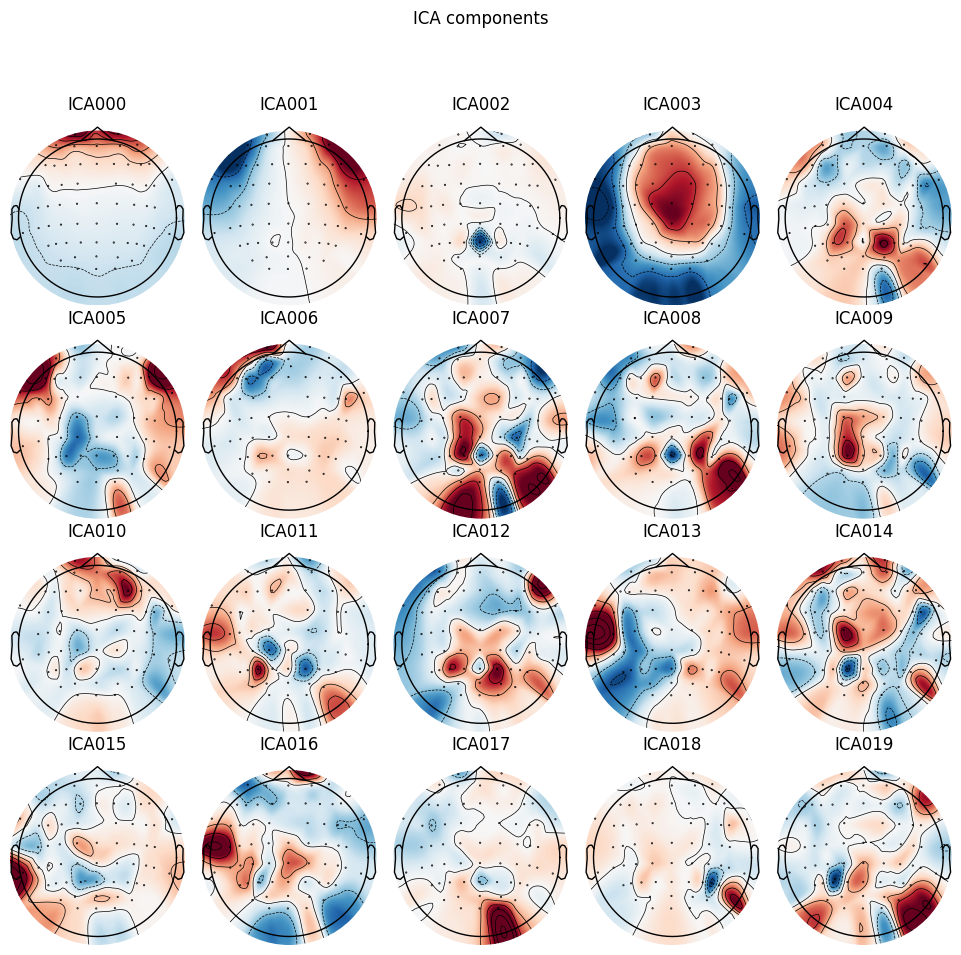

Creating RawArray with float64 data, n_channels=20, n_times=344090
    Range : 0 ... 344089 =      0.000 ...   688.178 secs
Ready.


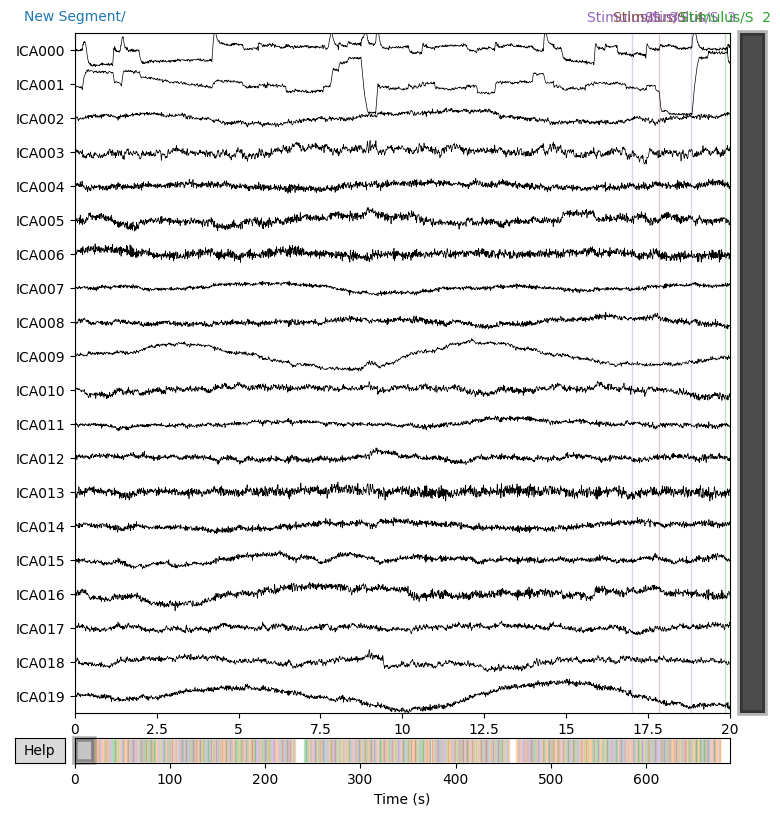

In [14]:
ica=mne.preprocessing.ICA(n_components=20, random_state=97)
ica.fit(raw_new)
ica.plot_components(picks=range(20), inst=raw_new);
ica.plot_sources(raw_new);

In [15]:
ica_exclude=[0, 1, 2]
ica.exclude=ica_exclude
ica.apply(raw_new)

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 63 PCA components


<RawBrainVision | FZ021_intensity.eeg, 66 x 344090 (688.2 s), ~173.4 MB, data loaded>

In [16]:
epochs=mne.Epochs(raw_new, events[0], event_id={'80dB' :1, '70dB' :2, '60dB' :3, '50dB' :4},
                 baseline=(-0.2, 0.0), tmin=-0.5, tmax=0.5, preload=True)

Not setting metadata
720 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 720 events and 501 original time points ...
0 bad epochs dropped


In [17]:
epochs

Number of events,720
Events,50dB: 18360dB: 18270dB: 17580dB: 180
Time range,-0.500 – 0.500 sec
Baseline,-0.200 – 0.000 sec


Need more than one channel to make topography for eeg. Disabling interactivity.


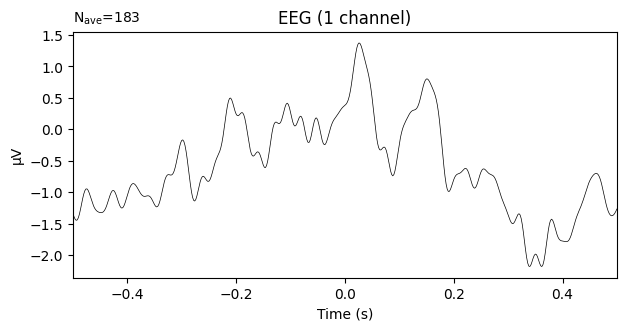

Need more than one channel to make topography for eeg. Disabling interactivity.


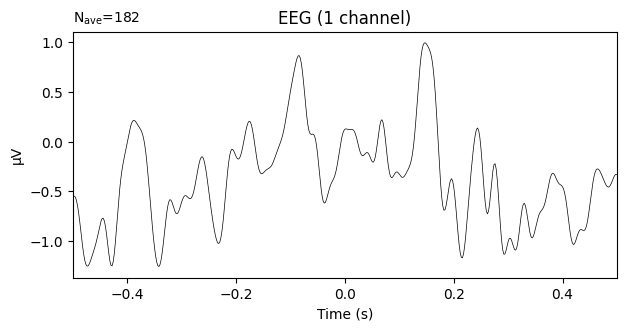

Need more than one channel to make topography for eeg. Disabling interactivity.


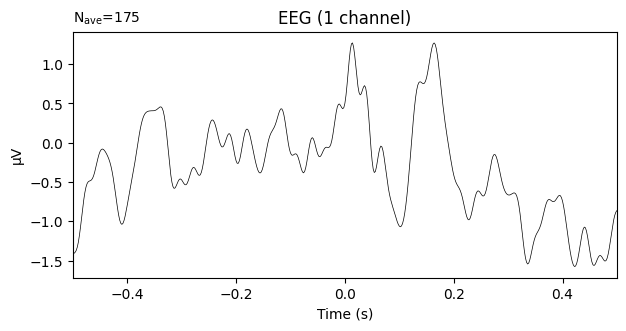

Need more than one channel to make topography for eeg. Disabling interactivity.


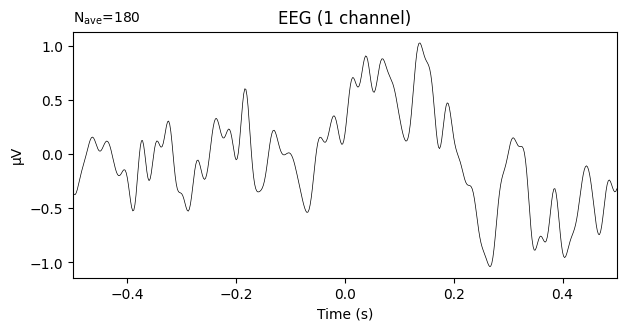

In [18]:
epochs['50dB'].average().plot(picks='Cz');
epochs['60dB'].average().plot(picks='Cz');
epochs['70dB'].average().plot(picks='Cz');
epochs['80dB'].average().plot(picks='Cz');

In [19]:
drop_epochs_by_sigma(epochs, 3)


Dropped 210 epochs: 3, 4, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21, 23, 26, 28, 29, 30, 31, 35, 39, 40, 43, 45, 48, 52, 55, 59, 61, 64, 67, 68, 69, 70, 71, 74, 75, 77, 78, 82, 85, 89, 90, 91, 93, 99, 102, 103, 105, 106, 108, 111, 114, 116, 117, 119, 122, 124, 128, 129, 134, 135, 138, 147, 154, 157, 161, 164, 165, 167, 170, 173, 176, 181, 189, 202, 219, 221, 223, 225, 226, 227, 229, 232, 236, 240, 241, 242, 243, 259, 263, 267, 276, 277, 278, 280, 286, 287, 293, 296, 297, 307, 308, 310, 312, 313, 314, 316, 318, 322, 324, 330, 335, 336, 338, 341, 344, 345, 348, 356, 357, 358, 360, 367, 369, 370, 378, 380, 381, 385, 388, 389, 391, 396, 398, 399, 402, 403, 409, 410, 413, 415, 416, 425, 426, 434, 443, 447, 448, 454, 458, 464, 467, 468, 469, 470, 471, 472, 480, 481, 482, 487, 491, 493, 495, 496, 499, 500, 512, 516, 517, 518, 525, 530, 532, 536, 537, 539, 545, 551, 553, 557, 561, 563, 569, 574, 580, 587, 589, 600, 601, 602, 607, 609, 610, 634, 635, 636, 640, 675, 682, 684, 688, 690, 692

In [ ]:
epochs.save('FZ021-epo.fif')

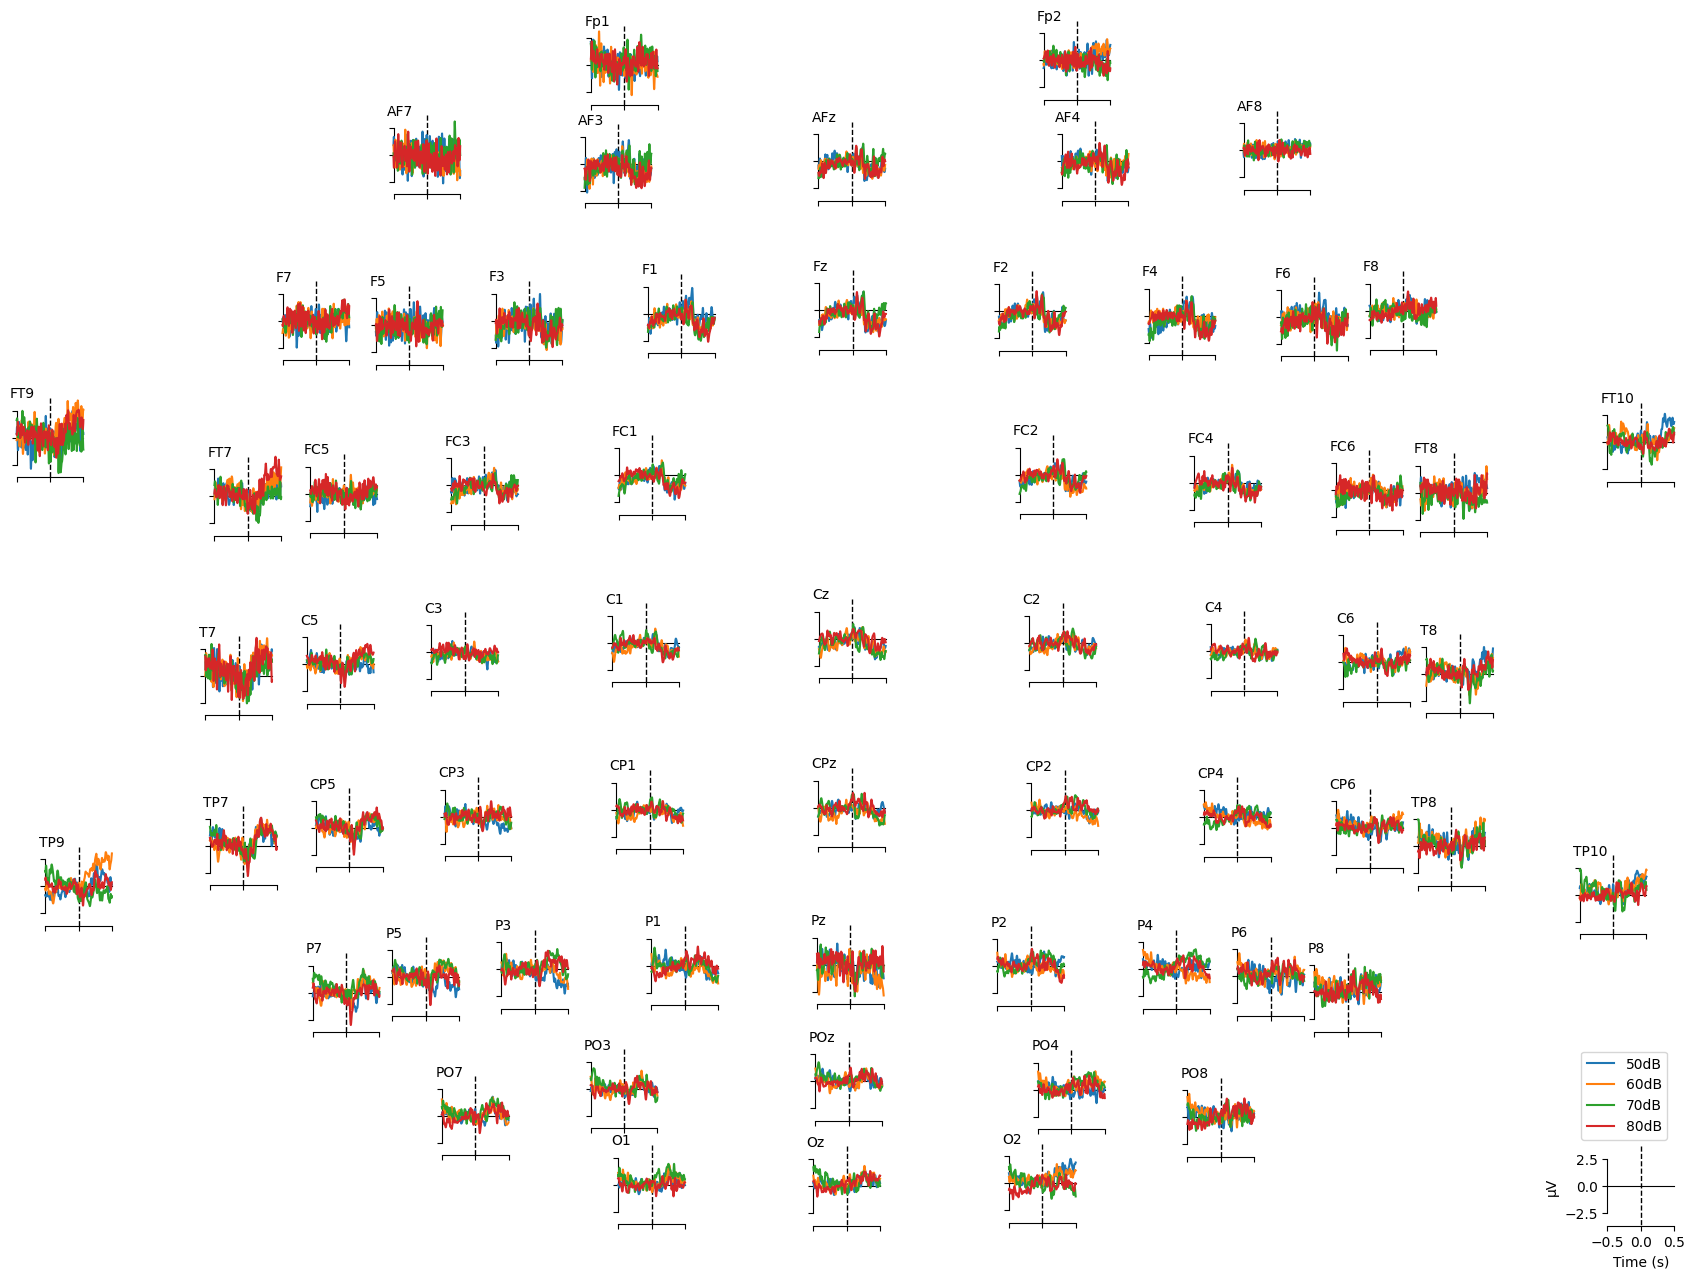

[<Figure size 1800x1400 with 64 Axes>]

In [23]:
mne.viz.plot_compare_evokeds({'50dB':epochs['50dB'].average(),
                              '60dB':epochs['60dB'].average(),
                              '70dB':epochs['70dB'].average(),
                              '80dB':epochs['80dB'].average()}, axes='topo')

mne.grand_average()